In [1]:
import pandas as pd
import numpy as np                                             
import matplotlib.pyplot as plt   
import seaborn as sns                                                           #Importing the libraries

In [2]:
bike_data = pd.read_csv("C:\\Users\\PUNEET SINGH\\bikes.csv")
print(bike_data.shape)  
bike_data.head()                                                          #reading the dataset and checking the shape of it

(191, 5)


,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [3]:
bike_data.drop(['date'],axis=1,inplace=True)

In [4]:
bike_data.head()

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.0
1,2.896673,54.267219,15.136882,108.0
2,4.235654,45.697702,17.034578,82.0
3,3.112643,50.237349,10.091568,88.0
4,2.723918,49.144928,15.738204,148.0


In [5]:
bike_data.dtypes                                           #checking the data types

temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [6]:
bike_data.describe()                 #summary of the data and can also see the outliers through count function

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [7]:
######### checking for missing values and heat_map#######################
bike_data.isnull().sum()

temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

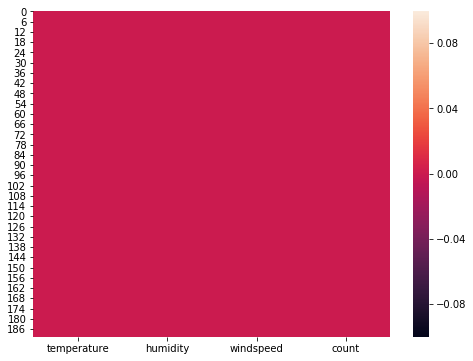

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(bike_data.isnull())
plt.show()

In [9]:
##################  univariate anaylysis  ########################

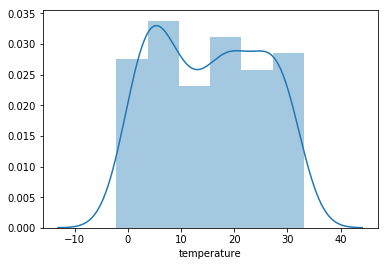

In [10]:
sns.distplot(bike_data['temperature']) 
plt.show()                                                               #checking for normal distribution 

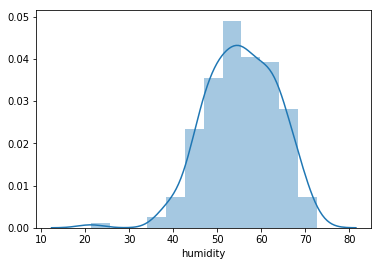

In [11]:
sns.distplot(bike_data['humidity'])                                   #checking for normal distribution

AxesSubplot(0.125,0.125;0.775x0.755)


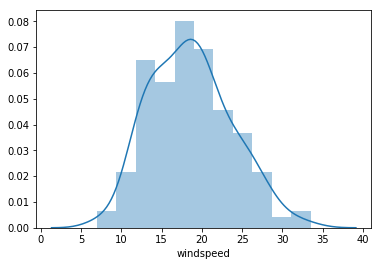

In [12]:
print(sns.distplot(bike_data['windspeed']))                                       #checking for normal distribution

AxesSubplot(0.125,0.125;0.775x0.755)


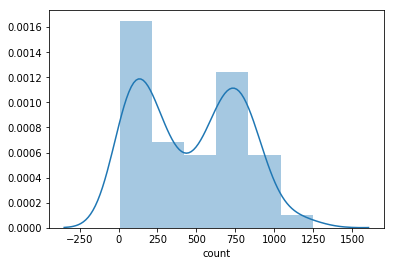

In [13]:
print(sns.distplot(bike_data['count']))                                        #checking for normal distribution

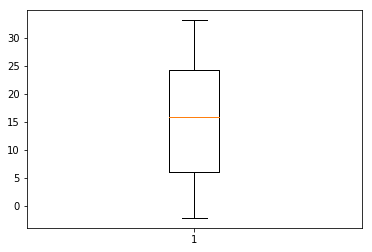

In [14]:
################## checking the outliers ###########################
plt.boxplot(bike_data['temperature'])
plt.show()

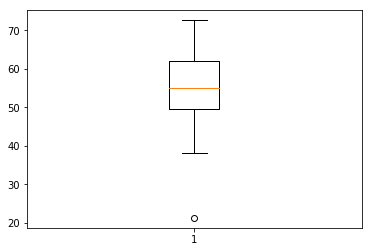

In [15]:
plt.boxplot(bike_data['humidity'])                                      #checking for outliers
plt.show()
            

In [16]:
bike_data = bike_data[bike_data['humidity']>40]                     #removing the outliers from the humidity column 

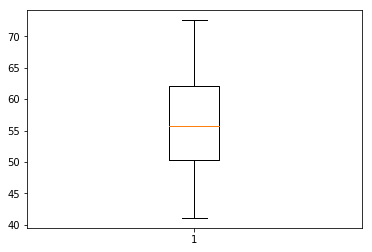

In [17]:
plt.boxplot(bike_data['humidity'])
plt.show()                                                              

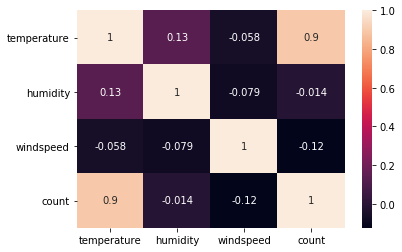

In [18]:
############### finding the correlation between the feature and target variable through heatmap##############################
corr_heatmap = bike_data.corr()
sns.heatmap(corr_heatmap,annot=True)
plt.show()


In [19]:
############## forming a linear regression model ########################

In [20]:
x = bike_data.iloc[:,1:4].values
y = bike_data.iloc[:,-1].values                   

In [21]:
y.shape

(185,)

In [22]:
#spilliting the dataset
from sklearn.model_selection import train_test_split                #importing the library

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [24]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(148, 3) (148,) (37, 3) (37,)


In [25]:
y_train=y_train.reshape(-1,1)
y_train.shape

(148, 1)

In [26]:
y_test = y_test.reshape(-1,1)
print(y_test.shape)

(37, 1)


In [27]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(148, 3) (148, 1) (37, 3) (37, 1)


In [28]:
############### creating a multiple linear model################
from sklearn.linear_model import LinearRegression                     #importing the libraray

In [29]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred = regression.predict(x_test)

In [31]:
regression.intercept_

array([-2.27373675e-13])

In [32]:
regression.coef_

array([[2.41894910e-15, 2.22789201e-14, 1.00000000e+00]])

In [33]:
# calculating the score
score = regression.score(x_test,y_test)*100                             # this shows that 100% model has been trained
score                                                                      

100.0

In [34]:
# checking the predction scores through regression metrics
# Importing the library
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
error = mean_absolute_error(y_pred,y_test)*100
error

2.0308079542332592e-11

In [36]:
sqraed_error = mean_squared_error(y_pred,y_test)
sqraed_error

5.7487406965946e-26

In [37]:
def MAPE(y_test,pred):
    mape = np.mean(np.abs(y_test-y_pred/y_test))
    return mape

In [38]:
MAPE(y_test,y_pred)

506.9031531531533

In [54]:
score = r2_score(y_pred,y_test)*100
score
# LINEAR MODEL HAS PREDICTED 100 % ACCURACY WHICH LEADS TO OVERFITTING. 

100.0

In [39]:
###################### decision tree regression ############

In [40]:
from sklearn.tree import DecisionTreeRegressor        #importing the library

In [41]:
regressor = DecisionTreeRegressor(max_depth=2)                      #making a class and training the dataset
regressor.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
pred = regressor.predict(x_test)                              #predicting the values
pred

array([919.85185185,  95.68537415, 673.77777778, 673.77777778,
        95.68537415, 919.85185185, 673.77777778,  95.68537415,
       673.77777778, 919.85185185, 673.77777778, 673.77777778,
        95.68537415, 673.77777778, 673.77777778, 673.77777778,
       919.85185185, 673.77777778, 296.90740741, 296.90740741,
        95.68537415, 296.90740741, 673.77777778,  95.68537415,
        95.68537415, 673.77777778, 296.90740741, 919.85185185,
        95.68537415, 296.90740741, 673.77777778, 919.85185185,
       673.77777778, 673.77777778, 296.90740741, 296.90740741,
       673.77777778])

In [43]:
# checking how good the model has been trained
regressor.score(x_test,y_test)*100
# MODEL HAS PREDICTED WITH 94% CORRECT

93.90241182636917

In [59]:
# checking the scores of the predicted data
score = mean_absolute_error(y_test,pred)
score

58.74352413638124

In [60]:
MAPE(y_test,pred)

506.9031531531533

In [46]:
############ KNN MODEL #############
from sklearn.neighbors import KNeighborsRegressor
K_regressor = KNeighborsRegressor(n_neighbors=5)

In [47]:
K_regressor.fit(x_train,y_train)
pred_y=K_regressor.predict(x_test)

In [48]:
# checking how good the model has been trained
K_regressor.score(x_test,y_test)*100


99.94248494101143

In [49]:
# checking the scores of the predicted data
score = mean_absolute_error(y_test,pred_y)
score

4.486036036036023

In [50]:
sqraed_error = mean_squared_error(pred_y,y_test)
sqraed_error

48.16290540540538

In [51]:
MAPE(y_test,pred_y)                              #Mean absolute percentage error

506.9031531531533

In [52]:
############# ON THE BASIS OF ABOVE RESULTS IT IS CLEAR THAT DECISION TREE MODEL IS PREDICTING THE BEST WITH 94% ACCURACY#########